# A Game to Reach the Top
## The Game 
The goal of the game is to have a walk with the most steps within 100 turns. The number of dice defines the number of steps. Each number is associated with the following conditions; 
-	Number 1 and 2; take one step back (-1 step) 
-	Number 3, 4, and 5; take one step forward (+1 step) 
-	Number 6, roll the dice again to determine how many steps to take in this case the following applies; 

Number 1 (+1 step), Number 2 (+2 steps), Number 3 (+3 steps), Number 4 (+4 steps), Number 5 (+5 steps), Number 6 (+6 steps). 

## The Situation
As two players are discussing the game, one makes the following statement: 

*“I bet that I can get at least 60 steps or more within the walk of a 100 turns.”*

To confirm this bet, we have to run multiple simulations in order to determine the changes of this happening.

Luckily, we can do this within python. Let’s get to it. 

### Step 1: Create the Game Simulation

In [2]:
import numpy as np   

np.random.seed(123) 
random_walk = [0] 
 
for steps in range(100) : 
    step = random_walk[-1] 
    dice = np.random.randint(1,7) 

    if dice <= 2: 
        step = max(0, step - 1) 
        
    elif dice <= 5: 
        step = step + 1 
    else: 
        step = step + np.random.randint(1,7) 
    
    random_walk.append(step) 

print(random_walk) 

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


In order to run this simulation, we need to use some of the functions of the numpy package. Therefore, we have to start with importing this. 

The **np.random.seed()** is used in order to have the same set of numbers will appear every time.
In order to define the start of the journey in steps, the variable **random_walk** is set to 0.  

To create the simulation, we have to execute a **for** loop, which is used for iterating over a sequence. 
By using the **range()** function, it allows us to set the number of turns, which is in this game a 100. 

The following conditions are set in order to run the simulation. 
- the steps variable uses **random_walk[-1]**, as this refers to total number of steps in each round. Whenever a turn is run, the steps will be added to the last number it recorded. 
- **np.random.randint(1,7)** is used in order to define the numbers on the dice, which is one to 1. The 7 that is defined is excluded in the formula. 

Now we need to use if-elif-else statement, to set the rules of the game. 
- The If-statement defines the condition of when the dice is less or equal to 2, it will generate a step back -1. The **max()** always returns the largest number. As 0 is the specified as the lowest number, it cannot return a negative output. 
- the Elif-statement defines the numbers of 3,4,5 with the condition to add 1 step. 
- The Else-statement refers to the number 6 and uses **np.random.randint(1,7)** again in its condition to determine the number of steps. 

The **append()** method adds a single item to the existing list. The existing list is **random_walk** by adding the generated number defined in the variable step. 

Lastly, we need to print the list **random_walk** in order to get the accumulated result of one simulation. 

### Step 2: Running Multiple Simulations
In order to run multiple sumilation, we need to define another **for** loop and an undefined list. 

The range of the new **for** loop is set to 500 as this will be the number of simulations that we will run in order to determine the chances for the bet. 

Another if statement as been added in order to reduce the errors. Everythig that is less or equal to 0.001, will return as a 0 value. 

The list defined in the beginning **all_walks**,  represents all the generated numbers of each simulation. This is why you will get a big list, as it contains 50,000 generated numbers.

Scroll down in order to get to step 3.

In [6]:
all_walks = []

for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
            
        if np.random.rand() <= 0.001 :
            step = 0
            
        random_walk.append(step)
    all_walks.append(random_walk)
    
print(all_walks)

[[0, 1, 0, 0, 1, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 0, 1, 2, 3, 4, 5, 6, 5, 4, 10, 9, 8, 9, 10, 13, 12, 13, 18, 17, 19, 20, 19, 18, 19, 18, 19, 20, 25, 26, 27, 26, 25, 24, 28, 29, 30, 31, 37, 38, 39, 38, 39, 38, 39, 40, 41, 42, 41, 42, 41, 42, 41, 40, 41, 42, 43, 44, 45, 44, 43, 46, 45, 46, 45, 50, 51, 50, 51, 52, 53, 52, 53, 55, 56, 57, 60, 59, 58, 57, 59, 58, 59, 60, 59, 58], [0, 5, 8, 9, 10, 11, 17, 18, 17, 19, 18, 17, 16, 17, 16, 15, 17, 18, 19, 25, 24, 25, 28, 29, 30, 29, 28, 27, 33, 34, 35, 34, 35, 37, 38, 37, 36, 37, 38, 39, 40, 41, 40, 41, 40, 39, 40, 41, 40, 41, 42, 43, 42, 41, 42, 47, 52, 53, 52, 51, 50, 51, 52, 55, 61, 60, 59, 60, 64, 63, 64, 68, 67, 68, 69, 68, 69, 68, 67, 68, 69, 71, 72, 73, 74, 76, 77, 76, 77, 81, 80, 79, 80, 79, 78, 77, 78, 79, 80, 81, 80], [0, 1, 0, 0, 1, 6, 7, 8, 12, 11, 12, 13, 14, 13, 16, 17, 18, 24, 27, 33, 32, 31, 30, 29, 31, 32, 33, 34, 35, 36, 37, 40, 39, 40, 39, 38, 39, 38, 39, 40, 41, 40, 39, 38, 40, 39, 40, 41, 42, 43, 44, 43, 42, 43, 45, 46, 47

### Step 3: Visualize the Simulations
As this list with 50,000 generated numbers, it is better to visualize this in a graph. A histogram is one method to create a visualization that makes sense. 


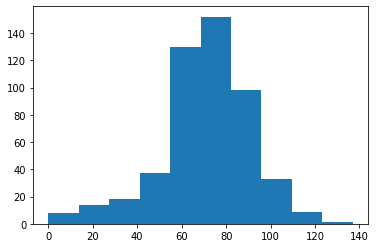

In [7]:
import matplotlib.pyplot as plt

all_walks = []

for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))

ends = np_aw_t[-1]

plt.hist(ends)
plt.show()

Do not forget to import the matplotlib package in order to create a graph. 

A new variable needs to be created in order to display the list in an appriopiate way within a histogram. Here **np.transpose** is used to rearrange the dimensions of the **all_walk** array in the order specified. 

The variable **ends** allows the view to be adjusted, so that the viewer will only see the last number of each simulation, which represents the total number of steps. By specifying [-1], these values will be returned. 

**plt.hist(ends)** creates the histogram while **plt.show()** displays the graph.

### Step 4: Calculating the odds


In [8]:
print(np.count_nonzero(ends >= 60) / len(ends))

0.764


The **numpy.count_nonzero** function, the all the numbers of non-zero values in the end list, with the condition that it is equal or more than 60. The **len** function, on the other hand, returns the total numbers within the list. 

By dividing the **numpy.count_nonzero** with the **len**, you will get a number that can be converted into a percentage. 

**The odds of getting 60 or more steps within a 100 turns is equal to 76.4%**